# Recurrent Neural Network
Most neural networks are strictly feed forward, information stricly passes in one direction. Recurrent neural networks allow for each neuron to have a degree of memory. Unlike a feedforward network, in which all inputs are given at the same time to get a given prediction, a recurrent network takes the inputs in sequence. This allows it to have variable input sizes, and for it to remember context from previous entries to determine its final output. This memory is implemented by having a hidden state which acts as an additional input when computing the input sum.

These can have many different input-output relationships. One input to one output, one input to many outputs, many inputs to one output, many inputs to many outputs. What about the network determines this relationship? 

One can use these to form deep networks, and (HOW?) bidirectional recurrent networks, so that the answer in response to each individual input is influenced by terms to either side of it.

To train them typically uses a technique called backpropagation through time

I want to try and build a recurrent perceptron before using a tutorial.

In [1]:
import numpy as np
# input weights [x]
# activation function
# summation function [x]
# recurrent input
data = np.random.rand(100,10)
print(data[0])



[0.08832167 0.47754376 0.40095194 0.70201259 0.78310929 0.7239078
 0.31295863 0.34847856 0.69853506 0.43467061]


In [8]:
hidden = 0
weights = [np.random.random() for i in range(3)] # weights at index -1 will be bias, weights at -2 will be recurrent

# each entry in the data
for d in data:
    inputs = d
    
    # iterate through the elements of a data string
    for i in inputs:
        activation = max(0, weights[0]*i + hidden*weights[1] + weights[2])
        # activation = np.log(1+exp(in_sum(inputs, weights, hidden))) # softplus
        # acivation = max(0.01*sum(weights[0]*i + hidden*weights[1] + weights[2]), sum(weights[0]*i + hidden*weights[1] + weights[2])) # Leaky relu
        hidden = activation

print(weights)
print(inputs)

[0.4205140315251996, 0.8701747105460453, 0.043348730549622516]
[0.68580201 0.46507539 0.96930019 0.67505638 0.57929582 0.669301
 0.10857583 0.52730023 0.8546198  0.37807768]


Thus far, it will make 100 predictions, but it doesn't yet have the ability to learn from them.

For our first real RNN, try the Elman network from: https://www.cpuheater.com/deep-learning/introduction-to-recurrent-neural-networks-in-pytorch/

This has three layers: a single input neuron, with three recurrent neurons in the hidden layer, and a single output neuron.

This uses pytorch for constructing and manipulating the network. It will be used to predict a sine wave

In [17]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.init

Setting some hyperparameters: the network structure, how much to train it, how long a sequence of inputs should be, and the learning rate

In [4]:
dtype=torch.FloatTensor
input_size = 7
hidden_size = 6
output_size = 1
epochs = 300
seq_length = 20
lr = .01

Additionally, we need to generate training data. In this case, the data is a sine wave. In more practical examples, this would be imported and cleaned data of some kind. What is Variable?

linspace generates a list of `seq_length+1` values with equal intervals, starting from `2` and ending at `10`.

In [6]:
data_time_steps = np.linspace(2,10, seq_length+1)
print(data_time_steps)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:] ).type(dtype), requires_grad=False)

[ 2.   2.4  2.8  3.2  3.6  4.   4.4  4.8  5.2  5.6  6.   6.4  6.8  7.2
  7.6  8.   8.4  8.8  9.2  9.6 10. ]


Next we need to create weight matrices both for the input to hidden connection, and for the hidden to output connection. Since these are the parts of the network that will be changing
what does init do?
why convert to Variable?

In [9]:
w1 = torch.FloatTensor(input_size, hidden_size).type(dtype)
torch.nn.init.normal_(w1, 0.0, 0.4)
w1 = Variable(w1, requires_grad=True)

w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
torch.nn.init.normal_(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad=True)

Context state is a representation of what it has seen so far of the sequence.

In [10]:
def forward(input, context_state, w1, w2):
    xh = torch.cat((input, context_state), 1)
    context_state = torch.tanh(xh.mm(w1))
    out = context_state.mm(w2)
    return (out, context_state)

In [13]:
for i in range(epochs):
    total_loss = 0
    
    # what does this do?
    context_state = Variable(torch.zeros((1,hidden_size)).type(dtype), requires_grad=True)
    
    for j in range(x.size(0)):
        # get inputs and outputs
        input = x[j:(j+1)]
        target = y[j:(j+1)]
        
        # create a prediction, and update the context
        (pred, context_state) = forward(input, context_state, w1, w2)
        
        # calculate loss
        loss = (pred - target).pow(2).sum()/2
        total_loss += loss
        loss.backward() # figure out the gradient from the loss back to the weights
        
        # change the weights for both weight matrices
        w1.data -= lr*w1.grad.data
        w2.data -= lr*w2.grad.data
        
        
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        
        context_state = Variable(context_state.data)
        
    #if i%10 == 0:
    #    print(f"Epoch: {i} loss {total_loss.data[0]}")


In [25]:
print(len(x[0:]))


20


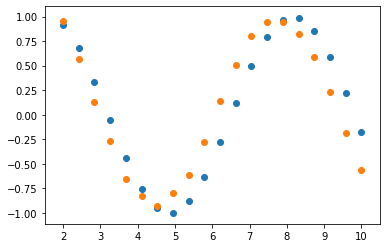

In [26]:
context_state = Variable(torch.zeros((1,hidden_size)).type(dtype),requires_grad=False)
predictions = []

for i in range(x.size(0)):
    input = x[i:i+1]
    (pred,context_state)=forward(input,context_state, w1, w2)
    predictions.append(pred.data.numpy().ravel()[0])

plt.figure()
plt.scatter(np.linspace(2,10,20), x[0:])
plt.scatter(np.linspace(2,10,20), predictions)

# LSTM
Try for an LSTM perceptron?


How many weights do I have?
what kinds of structures are hidden and cell? scalar? 
are forget, input output and gate functions or values?
how are hidden, weight, and input combined?

In [12]:
hidden = 0
cell = 0

weights = np.random.rand(4,3)# i(nput) f(orget) o(utput) g(ate)   (bias??), input hidden
    
sig = lambda x: 1/(1+np.exp(-x))

# each entry in the data
for d in data:
    inputs = d
    
    # iterate through the elements of a data string
    for i in inputs:
        inp    = sig(weights[0,0]*i   + weights[0,1]*hidden + weights[0,1]) #?
        forget = sig(weights[1,0]*i   + weights[1,1]*hidden + weights[0,1]) #?
        output = sig(weights[2,0]*i   + weights[2,1]*hidden + weights[0,1]) #?
        gate = np.tanh(weights[2,0]*i + weights[2,1]*hidden + weights[0,1]) #?

        cell = forget*cell + inp*gate
        hidden = output*np.tanh(cell)

print(weights)
print(hidden)
print(cell)

[[0.11601758 0.71481921 0.63170343]
 [0.09406289 0.53574218 0.95437069]
 [0.07622232 0.99387198 0.81268108]
 [0.76948057 0.24984377 0.72087294]]
0.8246292510288984
3.182920207449984


# LSTM Guide with pytorch
https://blog.floydhub.com/long-short-term-memory-from-zero-to-hero-with-pytorch/